<a href="https://colab.research.google.com/github/Aquianet/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/Copy_of_LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

noes:

youll only shape once in the beginning of the project. most of the time is epnt buidling visuals and models. 

sql:
Select column_names
FROM table1
LEFT JOIN Orders
ON CUstomer.customerIID.CUstomerID
ORDER BY Customer.CUstomernamey

tidyu data 

each var forsm a c lomun and contains values 
each obnservatiuon from s a row 
each tupr of observatuion unit forms a table

how to visuallize data top 4
1.value count 
2.pivot table
3.corsstabe 
4.melt

finding data source ideas
data story telling project
+++


## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-08-02 03:37:52--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.146.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.146.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  57.5MB/s    in 3.4s    

2019-08-02 03:37:56 (57.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd

aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### departments

In [0]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### order_products__prior

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
#good to check mem resources,
#you can delete a var with del to free up mem.
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        2477        6707           0        3837       12256
Swap:             0           0           0


### orders

In [0]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### products

In [0]:
#unique identifer = data that is unquie no matter how long it is. 
#knowing what you can join data tables on is generally the first step.


In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

#use assertion error as a validation technique

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [0]:
#write a boolean statment to subset date
#creat a list of columsn you want to subset

orders.head(2)
columns = ['order_id', 	'user_id' ,	'eval_set', 	'order_number', 	'order_dow' ,	'order_hour_of_day', 	'days_since_prior_order']
subset = orders.loc[(orders.user_id == 1)&(orders.order_number <= 2), columns]
subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


Merge with columns from `products`

In [0]:
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [0]:
merged = pd.merge(subset, order_products[['order_id', 'add_to_cart_order']], how='left', on='order_id')
merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order
0,2539329,1,prior,1,2,8,NaN,1
1,2539329,1,prior,1,2,8,NaN,2
2,2539329,1,prior,1,2,8,NaN,3
3,2539329,1,prior,1,2,8,NaN,4
4,2539329,1,prior,1,2,8,NaN,5


In [0]:
products.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [0]:
#dont forget the double brakets 
final = pd.merge(merged, products[['product', 'product_name']], how='left', on='product_name')

KeyError: ignored

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

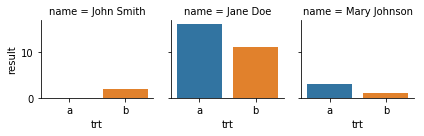

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

## 4 ways to reshape and plot

### 1. value_counts

### 2. crosstab

### 3. Pivot Table

### 4. melt

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# Banana = int(products[products.product_name == 'Banana']['product_id'])
# print(Banana)
#          products.product_name == 'Bag of Organic Bananas' or
#          products.product_name == 'Organic Strawberries' or
#          products.product_name == 'Organic Baby Spinach' or
#          products.product_name == 'Organic Avocado' or
#          products.product_name == 'Limes' or
#          products.product_name == 'Strawberries' or
#          products.product_name == 'Organic Whole Milk']
#testing int() vs. pd.value
print(products[products.product_name == 'Banana']['product_id'].values)

[24852]


In [0]:
#function to create a list of product number from string of product name
func_product_numbers = lambda string : int(products[products.product_name == string]['product_id'])

#top 10 most frequently ordered products
product_names = [
    'Banana',
    'Bag of Organic Bananas',
    'Organic Strawberries',
    'Organic Baby Spinach',
    'Organic Hass Avocado',
    'Organic Avocado',
    'Large Lemon',
    'Strawberries',
    'Limes',
    'Organic Whole Milk',
]
#generating list of product numbers 
# product_numbers = [func_product_numbers(x) for x in  product_names]
# product_numbers

In [0]:
#generating a dict i think would be more effiecent to keep track of what numbers and product names together

#dict_products = {}
#[dict_products() for k in product_names]
#dict_products()

#creating dict using dict comprehension. 
dict_products = {x:func_product_numbers(x) for x in product_names}
dict_products

{'Bag of Organic Bananas': 13176,
 'Banana': 24852,
 'Large Lemon': 47626,
 'Limes': 26209,
 'Organic Avocado': 47766,
 'Organic Baby Spinach': 21903,
 'Organic Hass Avocado': 47209,
 'Organic Strawberries': 21137,
 'Organic Whole Milk': 27845,
 'Strawberries': 16797}

In [0]:

#dict_products_df = {k:order_products__prior[order_products__prior.product_id == v].copy() for k,v in dict_products }
dict_products_df = {k:order_products__prior[order_products__prior.product_id == v].copy() for k,v in dict_products.items() }
dict_products_df

{'Bag of Organic Bananas':           order_id  product_id  add_to_cart_order  reordered
 30               5       13176                  1          1
 241             27       13176                  1          1
 286             29       13176                  3          1
 304             32       13176                  3          1
 341             42       13176                  3          1
 445             55       13176                  6          1
 482             58       13176                  4          1
 492             60       13176                  5          1
 549             67       13176                  1          1
 698             83       13176                  1          1
 828             93       13176                 12          0
 917            105       13176                  3          1
 1127           125       13176                  7          1
 1168           128       13176                  4          1
 1175           129       13176             

In [0]:
#test code that generate a dataframe of one of the products
Banana = int(products[products.product_name == 'Banana']['product_id']) #setting product number to Banana
df_Banana = order_products__prior[order_products__prior.product_id == Banana].copy() #creating subset df of banana
print(df_Banana.shape)
df_Banana.head()


(472565, 4)


,order_id,product_id,add_to_cart_order,reordered
77,10,24852,1,1
180,20,24852,6,0
190,22,24852,3,1
234,26,24852,2,1
414,52,24852,2,1


In [0]:
#creating dict keys from list
list_items = ['item_1', 'item_2', 'item_3']
#dict_items = {}
#dict_items.update(list_items[0] = 1)

dict_items  = dict.fromkeys([x for x in list_items], 0)
dict_items

{'item_1': 0, 'item_2': 0, 'item_3': 0}

In [0]:
#saving dataframe in dict item
dict_items['item_1'] = order_products__prior[order_products__prior.product_id == Banana].copy()

In [0]:
def df_subset_function(dataframe, columns, items):
  dict_items = {}
  dict_items[]
  

In [0]:
df_Banana.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [0]:
#df_func = lambda :dataframe[dataframe.column == list_of_items_to_copy[i]].copy()

In [0]:
#creating subset df for Limes
Limes = int(products[products.product_name == 'Limes']['product_id'])
print(Limes)
df_Limes = order_products__prior[order_products__prior.product_id == Limes].copy()
print(df_Limes.shape)
df_Limes.head()

26209
(140627, 4)


,order_id,product_id,add_to_cart_order,reordered
521,62,26209,4,0
588,71,26209,8,1
1485,163,26209,10,1
2608,281,26209,2,1
3198,338,26209,10,1


In [0]:
df_Limes.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [0]:
#creating merged dataframe
df_top_10 = 

In [0]:
df_Limes_Banana = pd.concat([df_Limes , df_Banana]) #merging limes subset snd banana subset
print(df_Limes_Banana.shape)
df_Limes_Banana.head()

(613192, 4)


,order_id,product_id,add_to_cart_order,reordered
521,62,26209,4,0
588,71,26209,8,1
1485,163,26209,10,1
2608,281,26209,2,1
3198,338,26209,10,1


In [0]:
len(df_Banana) + len(df_Limes) == len(df_Limes_Banana)

True

In [0]:
[]

In [0]:
#beta1
# def df_concat_row(dataframe, column, list_of_items_to_copy):
#   i=0
#   df = lambda i: dataframe[dataframe.column == list_of_items_to_copy[i]].copy()
#   ['df_'+str(list_of_items_to_copy[i]) = df(i) for i in list_of_items_to_copy]
#   return new_dataframe

# #df_Banana = order_products__prior[order_products__prior.product_id == Banana].copy()

#beta2
def df_concat_row(dataframe, column, list_of_items_to_copy):
  dict_dataframes = {}
  []
  df = lambda i: dataframe[dataframe.column == list_of_items_to_copy[i]].copy()
  ['df_'+str(list_of_items_to_copy[i]) = df(i) for i in list_of_items_to_copy]
  return new_dataframe




In [0]:
#'df' + str(1)
#['df'+str(i+1) for i in range(0,5)]
df_func = lambda dataframe, column, item : dataframe[dataframe[column] == item].copy()

# df100 = df_func(order_products__prior, 'product_id', 26209)
# df100.head()
item_list = (26209, 24852)

[df_func(order_products__prior, 'product_id', x) for x in item_list]
# for x in item_list:
#   df_func(order_products__prior, 'product_id', x)

In [0]:
https://stackoverflow.com/questions/21949076/making-multiple-pandas-data-frames-using-a-loop-or-list-comprehension

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
order_products__prior.groupby(by=26209)

KeyError: ignored

In [0]:
#dict_items = {'item1': 1, 'item2':2, 'item2':3}
#{'items':[x for x in range(0,5)]}
#dict_items1 = 

dict_

{'items': [0, 1, 2, 3, 4]}

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)